<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/essa%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%8B%A4%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

yb 3조 미니 프로젝트 정나영 2,5,8,11

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

In [3]:
# 데이터 불러오기
train=pd.read_csv("/movies_train.csv")
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [4]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

2번

In [5]:
train_actor=train.loc[:,['num_actor','box_off_num']]
train_actor

,num_actor,box_off_num
0,2,23398
1,3,7072501
2,4,6959083
3,6,217866
4,2,483387
...,...,...
595,7,1475091
596,6,1716438
597,4,2475
598,4,2192525


In [6]:
train_actor.groupby('num_actor').agg(['count','mean'])

box_off_num              
                count          mean
num_actor                          
0                   9  4.498222e+03
1                  35  8.610237e+04
2                 154  5.987551e+05
3                 143  7.617409e+05
4                 114  6.505452e+05
5                  58  9.793652e+05
6                  33  6.717456e+05
7                  16  3.427331e+05
8                  16  1.564733e+06
9                   3  4.358153e+05
10                  8  2.833073e+06
11                  4  2.609364e+06
13                  2  2.930545e+05
14                  2  3.747500e+03
16                  1  1.547000e+03
22                  1  2.057896e+06
25                  1  2.821000e+03

In [7]:
train_actor_box=pd.DataFrame(train_actor.groupby(['num_actor'],as_index=False).mean())
train_actor_box

,num_actor,box_off_num
0,0,4.498222e+03
1,1,8.610237e+04
2,2,5.987551e+05
3,3,7.617409e+05
4,4,6.505452e+05
5,5,9.793652e+05
6,6,6.717456e+05
7,7,3.427331e+05
8,8,1.564733e+06
9,9,4.358153e+05


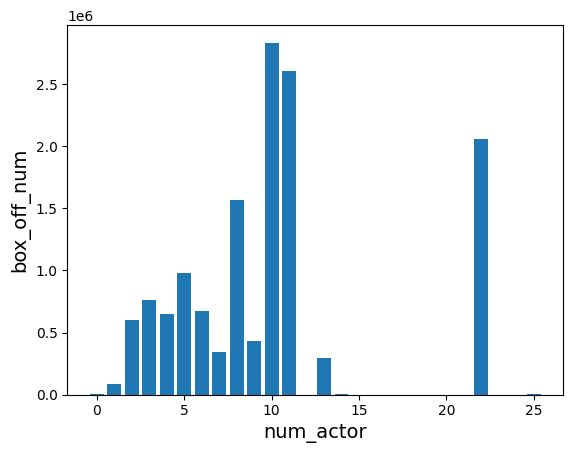

In [8]:
plt.bar(train_actor_box['num_actor'],train_actor_box['box_off_num'])
plt.xlabel('num_actor', fontsize=14)
plt.ylabel('box_off_num', fontsize=14)
plt.show()

In [9]:
train_actor_box.corr()

,num_actor,box_off_num
num_actor,1.000000,0.122371
box_off_num,0.122371,1.000000


5번

In [10]:
train_staff=train.loc[:,['num_staff','distributor']]
train_staff

,num_staff,distributor
0,91,롯데엔터테인먼트
1,387,(주)쇼박스
2,343,(주)쇼박스
3,20,(주)NEW
4,251,쇼박스(주)미디어플렉스
...,...,...
595,510,(주)NEW
596,286,(주)쇼박스
597,123,(주)마운틴픽쳐스
598,431,CJ 엔터테인먼트


In [11]:
train_staff_mix=train_staff.groupby(['distributor'],as_index=False).agg(['count','mean'])
train_staff_mix

num_staff            
                   count        mean
distributor                         
(주) 브릿지웍스              3   60.000000
(주) 액티버스엔터테인먼트         2   44.500000
(주) 영화사조제             10   44.100000
(주) 영화제작전원사            3   43.333333
(주) 케이알씨지             14   10.714286
...                  ...         ...
필름라인                   1    1.000000
하준사                    1    0.000000
한국YWCA연합회              1    2.000000
홀리가든                   4   22.250000
화앤담이엔티                 2  218.500000

[169 rows x 2 columns]

In [12]:
train_staff_mix.corr()

num_staff          
                    count      mean
num_staff count  1.000000  0.258816
          mean   0.258816  1.000000

In [14]:
train_staff_std=pd.DataFrame(train_staff.groupby(['distributor'],as_index=False).agg(['count','std']))
train_staff_std = train_staff_std[train_staff_std.num_staff['count'] != 1]
train_staff_std

num_staff           
                   count        std
distributor                        
(주) 브릿지웍스              3  13.747727
(주) 액티버스엔터테인먼트         2  30.405592
(주) 영화사조제             10  65.003333
(주) 영화제작전원사            3  31.895663
(주) 케이알씨지             14  12.868737
...                  ...        ...
트리필름                   3  63.089883
파이오니아21                2   0.707107
필라멘트 픽쳐스               6  71.746777
홀리가든                   4  13.475286
화앤담이엔티                 2  26.162951

[67 rows x 2 columns]

In [16]:
train_staff_std.num_staff['std'].mean()

73.61999451461905

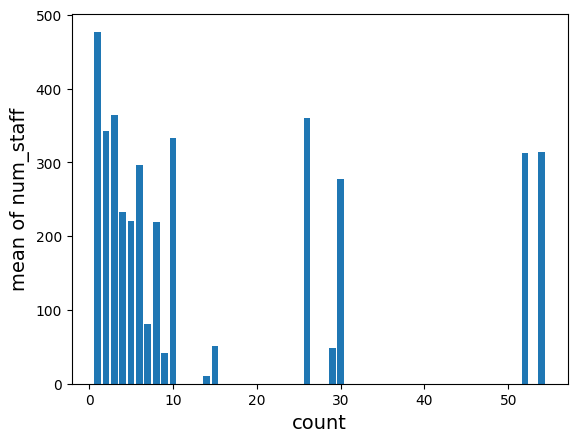

In [17]:
plt.bar(train_staff_mix[('num_staff','count')],train_staff_mix[('num_staff','mean')])
plt.xlabel('count', fontsize=14)
plt.ylabel('mean of num_staff', fontsize=14)
plt.show()


8번

In [18]:
train_time=train.loc[:,['time','box_off_num']]
train_time

,time,box_off_num
0,96,23398
1,130,7072501
2,123,6959083
3,101,217866
4,108,483387
...,...,...
595,111,1475091
596,127,1716438
597,99,2475
598,102,2192525


In [19]:
train_time_mean=pd.DataFrame(train_time.groupby(['time'],as_index=False).mean())
train_time_mean

,time,box_off_num
0,45,2919.0
1,60,328.0
2,61,129.5
3,62,223103.0
4,63,79.0
...,...,...
81,153,1744585.0
82,156,2260512.0
83,163,3350311.0
84,166,4398.0


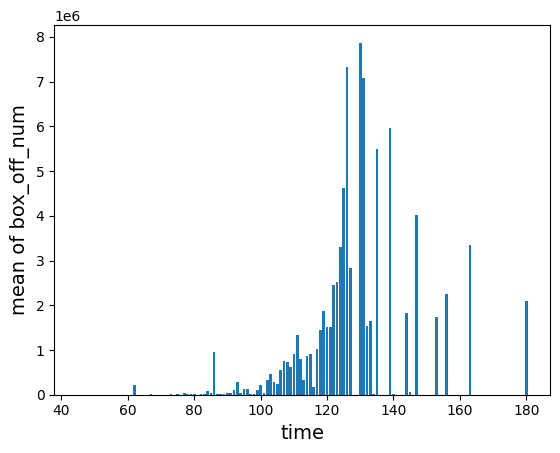

In [20]:
plt.bar(train_time_mean['time'],train_time_mean['box_off_num'])
plt.xlabel('time', fontsize=14)
plt.ylabel('mean of box_off_num', fontsize=14)
plt.show()

11번

In [21]:
train_num=train.loc[:,['num_actor','num_staff']]
train_num

,num_actor,num_staff
0,2,91
1,3,387
2,4,343
3,6,20
4,2,251
...,...,...
595,7,510
596,6,286
597,4,123
598,4,431


In [22]:
train_num_mean=pd.DataFrame(train_num.groupby(['num_actor'],as_index=False).mean())
train_num_mean

,num_actor,num_staff
0,0,6.222222
1,1,56.085714
2,2,154.331169
3,3,167.174825
4,4,157.228070
5,5,161.913793
6,6,129.030303
7,7,197.125000
8,8,175.375000
9,9,100.000000


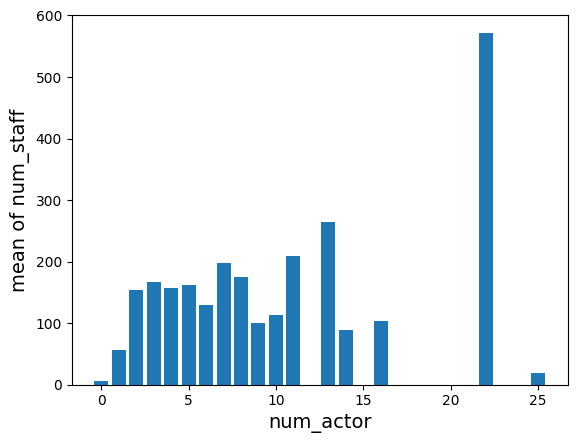

In [23]:
plt.bar(train_num_mean['num_actor'],train_num_mean['num_staff'])
plt.xlabel('num_actor', fontsize=14)
plt.ylabel('mean of num_staff', fontsize=14)
plt.show()

In [24]:
train_num_mean.corr()

,num_actor,num_staff
num_actor,1.000000,0.352704
num_staff,0.352704,1.000000
